In [1]:

import numpy as np
import pandas as pd 
import random

dataset = 4000

variables = 3

X = np.random.uniform(-5.0, 5.0, size = (dataset, variables))   # Generating Random Data uniformly within the range 

In [2]:
ST = []
for i in range (dataset):
    total = 0
    for j in range(variables):
        total = total+((X[i][j])**4 - 16*(X[i][j])**2+5*(X[i][j]))  # Test Function Calculation
        Total=total/2
    ST.append(Total)

In [3]:
data = pd.concat([pd.DataFrame(X),pd.DataFrame(ST)], axis=1)       # Concatenation of input and output data


In [5]:
data.to_excel('C:\\Users\\asus\\OneDrive\\Documents\\Anvesh_project\\datageneration.xlsx')   #Writing the Data to Excel File

Normalization of data

In [6]:
Data=pd.read_excel('C:\\Users\\asus\\OneDrive\\Documents\\Anvesh_project\\datageneration.xlsx') 

In [7]:
data1=Data.iloc[:,1:9]
from sklearn.preprocessing import MinMaxScaler      # To preprocess the data and Normalise the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data1.values)

In [8]:
scaled_data.shape

(4000, 4)

In [9]:
x = scaled_data[:,0:3]
y = scaled_data[:,3]

In [10]:
x.shape
y.shape

(4000,)

# ANN modeling Adam as optimizer

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15, random_state=0) 

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
net = Sequential()
net.add(Dense(90,input_dim=3,activation='linear'))       # Linear Activation Function
net.add(Dense(100,activation='relu'))                    # Rectified Linear Unit Activation Function
net.add(Dense(1,activation='relu'))                      # Rectified Linear Unit Activation Function

In [14]:
net.compile(optimizer = 'adam', loss = 'MSE')
print(net.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                360       
                                                                 
 dense_1 (Dense)             (None, 100)               9100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 9,561
Trainable params: 9,561
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history = net.fit(x_train, y_train, epochs = 500, validation_split=0.15)

Epoch 1/500
91/91 [==============================] - 3s 10ms/step - loss: 0.0183 - val_loss: 0.0154
Epoch 2/500
91/91 [==============================] - 1s 6ms/step - loss: 0.0157 - val_loss: 0.0142
Epoch 3/500
91/91 [==============================] - 0s 5ms/step - loss: 0.0141 - val_loss: 0.0124
Epoch 4/500
91/91 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.0101
Epoch 5/500
91/91 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.0110
Epoch 6/500
91/91 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0094
Epoch 7/500
91/91 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 8/500
91/91 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.0089
Epoch 9/500
91/91 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0088
Epoch 10/500
91/91 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 0.0087
Epoch 11

In [16]:
from sklearn.metrics import r2_score

In [17]:
y_train_pre = net.predict(x_train)

107/107 [==============================] - 0s 2ms/step


In [18]:
r2_train = r2_score(y_train, y_train_pre)
r2_train

0.9971310667387485

In [19]:
y_test_pre=net.predict(x_test)
r2_test = r2_score(y_test, y_test_pre)
r2_test 

19/19 [==============================] - 0s 2ms/step


0.9974495026359527

# Scatter plot

In [20]:
from matplotlib import pyplot as p

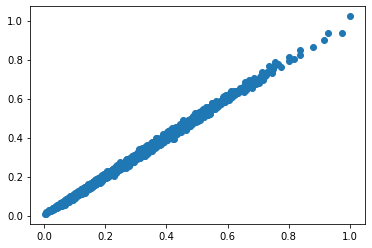

In [21]:
p.scatter(y_train, y_train_pre)

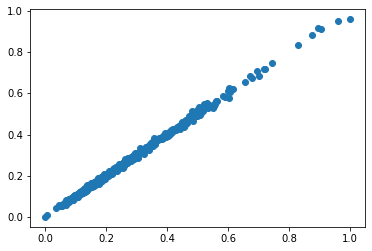

In [22]:
p.scatter(y_test, y_test_pre)

In [23]:
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train,y_train_pre)
mse_train

6.0726402064615814e-05

In [24]:
mse_test=mean_squared_error(y_test, y_test_pre)
mse_test

5.990650772922385e-05

# ANN modeling RMS as optimizer

In [27]:
net = Sequential()
net.add(Dense(90,input_dim=3,activation='linear'))        
net.add(Dense(100,activation='relu'))                   
net.add(Dense(1,activation='relu'))

In [28]:
net.compile(optimizer = 'RMSProp', loss = 'MSE')
history = net.fit(x_train, y_train, epochs = 500, validation_split=0.15)

Epoch 1/500
91/91 [==============================] - 1s 5ms/step - loss: 0.0203 - val_loss: 0.0249
Epoch 2/500
91/91 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0224
Epoch 3/500
91/91 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.0175
Epoch 4/500
91/91 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.0115
Epoch 5/500
91/91 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0122
Epoch 6/500
91/91 [==============================] - 0s 3ms/step - loss: 0.0110 - val_loss: 0.0115
Epoch 7/500
91/91 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.0095
Epoch 8/500
91/91 [==============================] - 0s 5ms/step - loss: 0.0102 - val_loss: 0.0093
Epoch 9/500
91/91 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.0103
Epoch 10/500
91/91 [==============================] - 0s 5ms/step - loss: 0.0098 - val_loss: 0.0093
Epoch 11/

In [29]:
y_train_pre = net.predict(x_train)

107/107 [==============================] - 0s 2ms/step


In [30]:
r2_train = r2_score(y_train, y_train_pre)
r2_train

0.9922120717480983

In [31]:
y_test_pre=net.predict(x_test)
r2_test = r2_score(y_test, y_test_pre)
r2_test

19/19 [==============================] - 0s 2ms/step


0.9933728901679092

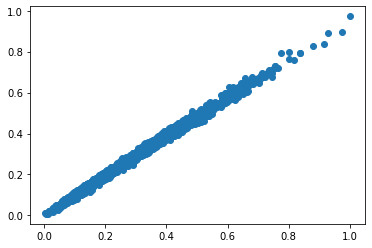

In [32]:
p.scatter(y_train, y_train_pre)

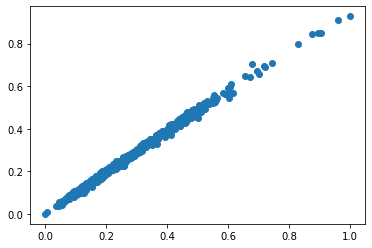

In [33]:
p.scatter(y_test, y_test_pre)

In [34]:
mse_tr=mean_squared_error(y_train,y_train_pre)
mse_tr

0.00016484624046955119

In [35]:
mse_te=mean_squared_error(y_test, y_test_pre)
mse_te

0.0001556586617084596